In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load labeled dataset
df = pd.read_csv("labeled_sessions.csv")
df.head()

,ip,total_hits,bot_hits,unique_paths,avg_interval,label
0,100.155.39.111,27,27,1,0.153846,bot
1,103.72.18.125,29,29,1,0.142857,bot
2,105.177.189.39,25,25,1,0.166667,bot
3,111.203.101.53,8,0,1,2.571429,human
4,112.253.116.103,24,24,1,0.173913,bot


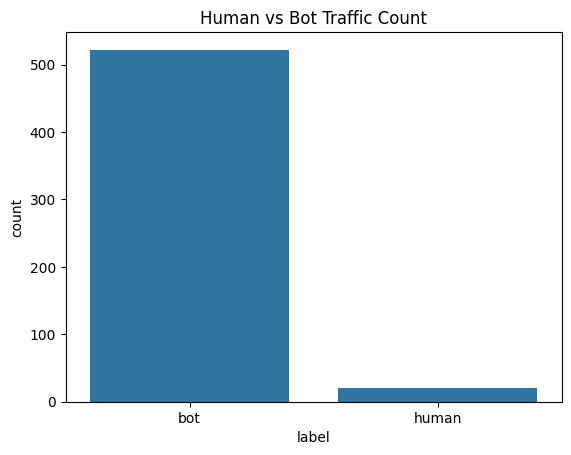

In [21]:
sns.countplot(x='label', data=df)
plt.title("Human vs Bot Traffic Count")
plt.show()

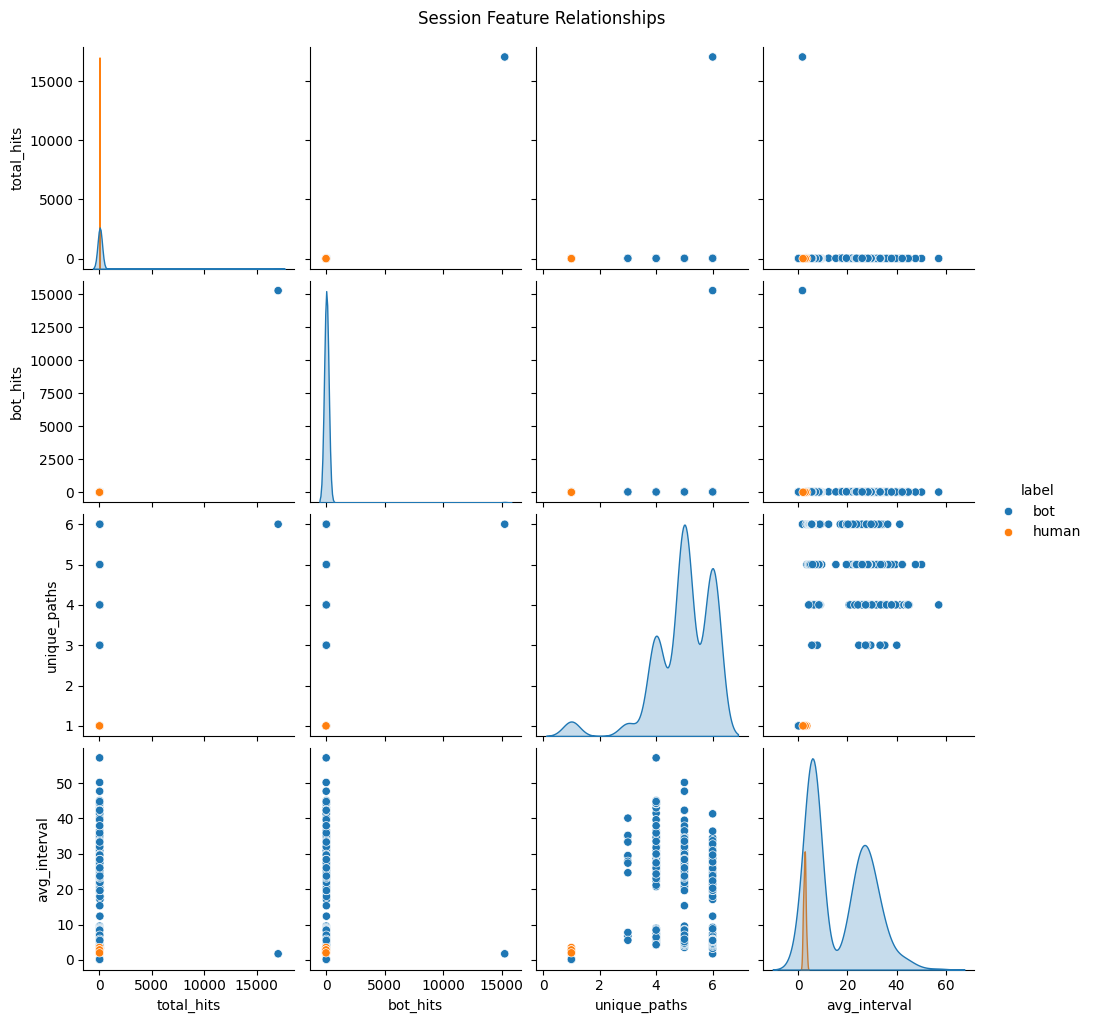

In [22]:
sns.pairplot(df, hue='label')
plt.suptitle("Session Feature Relationships", y=1.02)
plt.show()

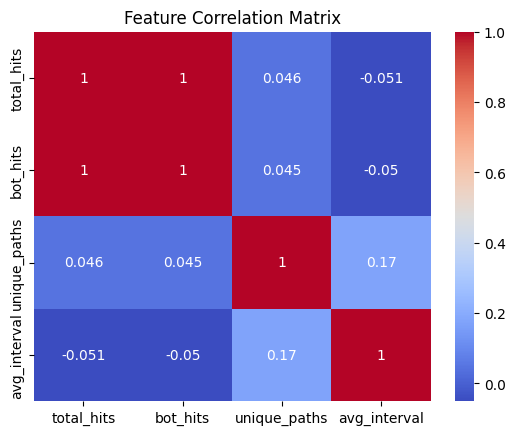

In [23]:
# Drop non-numeric columns like 'ip' and 'label'
sns.heatmap(df.drop(columns=['ip', 'label']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
print(df.shape)  # Should show (rows, columns)
print(df['label'].value_counts())

(1, 6)
label
bot    1
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
X = df[['total_hits', 'bot_hits', 'unique_paths', 'avg_interval']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [9]:
import pandas as pd
df = pd.read_csv("labeled_sessions.csv")
print(f"🔍 Rows: {len(df)}")
print(df['label'].value_counts())

🔍 Rows: 254
label
bot    254
Name: count, dtype: int64


In [12]:
import pandas as pd
df = pd.read_csv("labeled_sessions.csv")
print(df['label'].value_counts())

label
bot    254
Name: count, dtype: int64


In [13]:
df = pd.read_csv("labeled_sessions.csv")
print(df['label'].value_counts())

label
bot    507
Name: count, dtype: int64


In [14]:
df = pd.read_csv("labeled_sessions.csv")
print(df['label'].value_counts())

label
bot      522
human     20
Name: count, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

X = df[['total_hits', 'bot_hits', 'unique_paths', 'avg_interval']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest

lr = LogisticRegression().fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
iso = IsolationForest(contamination=0.3, random_state=42).fit(X_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_iso = pd.Series(iso.predict(X_test)).map({1: 'human', -1: 'bot'})


In [18]:
from sklearn.metrics import classification_report

print("🔎 Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("🌲 Random Forest:\n", classification_report(y_test, y_pred_rf))
print("🧪 Isolation Forest:\n", classification_report(y_test, y_pred_iso))


🔎 Logistic Regression:
               precision    recall  f1-score   support

         bot       1.00      1.00      1.00       157
       human       1.00      1.00      1.00         6

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163

🌲 Random Forest:
               precision    recall  f1-score   support

         bot       1.00      1.00      1.00       157
       human       1.00      1.00      1.00         6

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163

🧪 Isolation Forest:
               precision    recall  f1-score   support

         bot       0.90      0.36      0.51       157
       human       0.00      0.00      0.00         6

    accuracy                           0.34       163
   macro avg       0.45      0.18      0.26       163
weighted av

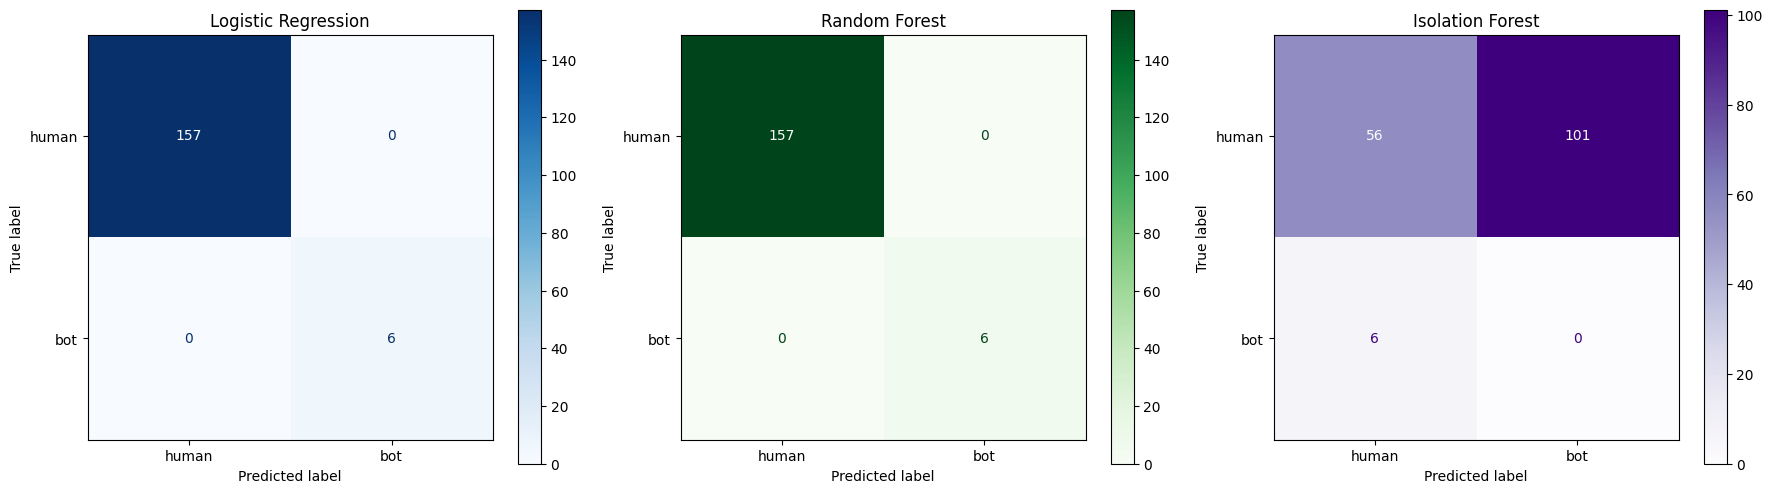

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=axes[0], display_labels=['human', 'bot'], cmap='Blues')
axes[0].set_title('Logistic Regression')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], display_labels=['human', 'bot'], cmap='Greens')
axes[1].set_title('Random Forest')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_iso, ax=axes[2], display_labels=['human', 'bot'], cmap='Purples')
axes[2].set_title('Isolation Forest')

plt.tight_layout()
plt.show()


# 🧠 Analysis Summary – Traffic Classification Notebook
##📌 Classification Report Summary

## Logistic Regression & Random Forest:
### - Both models achieved perfect precision, recall, and F1-score.
### - Why? The dataset is clean and well-separated using strong features.
### - Caution: Only 6 samples were human, 157 were bots → High class imbalance.

## Isolation Forest:
### - Precision for bots was decent (0.90), but recall was low (0.36).
### - It failed to identify human sessions entirely.
### - Takeaway: Unsupervised models struggle when one class dominates the data.

## 🔬 Feature Correlation Matrix

## Observations:
### - total_hits and bot_hits are perfectly correlated (r = 1.0)
### - avg_interval is mildly negatively correlated with bot_hits
### - Suggests bots generate more hits quickly and frequently.

## Conclusion:
### - avg_interval could be a key distinguishing feature for bots vs. humans.
### - Consider dropping one of the highly correlated features (total_hits or bot_hits).

## 📈 Pairplot: Session Feature Relationships

### Insights:
### - Bots show high total/bot hits and low avg_interval.
### - Humans appear in a separate, sparse region with low hits and higher delays.
### - Visual validation that current features can effectively separate traffic types.

## 🧠 Overall Takeaways

### - Supervised learning (Logistic, RF) performs exceptionally with strong session-level features.
### - Unsupervised models (Isolation Forest) are unreliable when data is imbalanced.
###- Need to gather more human session data to improve model fairness and robustness.

## ✅ Next Steps:
### - Collect more human traffic for balanced training.
### - Add new features: time_of_day, referer_entropy, click_entropy.
### - Consider oversampling or synthetic data generation for minority classes.